# Credit Card Fraud Detection using Random Forest

## Project Overview
This project focuses on building a **Random Forest classifier** to detect fraudulent credit card transactions. The dataset consists of transactions made by European cardholders in the year 2023, with over 550,000 records. All sensitive information has been anonymized to protect cardholders' identities.

The main goal is to develop a predictive model that can accurately identify potentially fraudulent transactions based on various transaction features.

## Dataset Description
The dataset includes the following key attributes:

- **id**: Unique identifier for each transaction  
- **V1-V28**: Anonymized features representing various transaction attributes (e.g., time, location, etc.)  
- **Amount**: The monetary value of the transaction  
- **Class**: Binary target variable indicating fraud (`1`) or non-fraud (`0`)  

## Potential Use Cases
- **Credit Card Fraud Detection**: Identify suspicious transactions to prevent financial losses.  
- **Merchant Category Analysis**: Explore patterns of fraud across different merchant categories.  
- **Transaction Type Analysis**: Investigate whether certain transaction types are more prone to fraud.

In this notebook, we will perform data preprocessing, exploratory data analysis, and implement a **Random Forest classifier** to predict fraudulent transactions.


In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [6]:
df = pd.read_csv("creditcard_2023.csv")

In [7]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [11]:
df.isnull().sum().sum()

#No null values found

0

### Splitting data into independent and dependent variables

In [13]:
X = df.drop(['id','Class'], axis=1)
y = df['Class']

In [16]:
print(X.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


### Train test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
X_train.shape , X_test.shape

((454904, 29), (113726, 29))

In [22]:
from sklearn.preprocessing import StandardScaler

## Feature scaling as we have 'amount' column that is not scaled
#### Random forest is scale invariant, so scaling is not neccessary , but scaling it anyway if we want to use any different model in future

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Lets check the class distribution
print(pd.Series(y_train).value_counts(normalize=True))

Class
0    0.500248
1    0.499752
Name: proportion, dtype: float64


#### Maybe the data is balanced using SMOTE or oversampling , because usually this distribution doesnt happen in real world scenarios

# Model Training

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

# I am entering these parameters manually as the data is huge, best recommended approach is RandomizedSearchCV to find the best hyperparam combinations

### Cross Validation 

In [31]:
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='f1')
print("\nCross-Validation F1 scores:",cv_scores)
print("Average F1 Score:", np.mean(cv_scores))


Cross-Validation F1 scores: [0.98470321 0.98644528 0.98474499 0.98431399 0.98386053]
Average F1 Score: 0.9848135979171477


#### Why do we fit the model after cross validation?
##### If we skip this step, our final model would only be trained on one fold (or subsets from CV), which is suboptimal.

In [32]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [33]:
y_pred = rf_model.predict(X_test_scaled)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     56750
           1       1.00      0.97      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



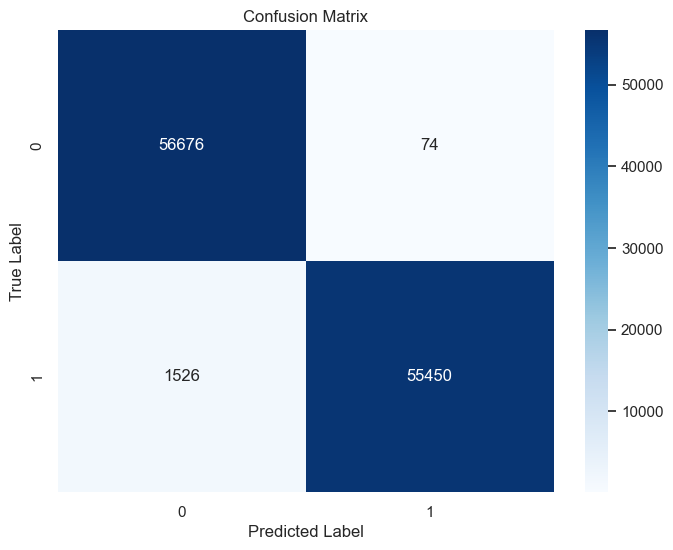

In [36]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Feature importance
### Uncovering which features contributed most to the prediction

In [37]:
importance = rf_model.feature_importances_
feature_imp = pd.DataFrame({
    'Feature':X.columns,
    'Importance': importance
}).sort_values('Importance', ascending = False)

In [38]:
feature_imp.head()

,Feature,Importance
9,V10,0.171738
3,V4,0.159135
13,V14,0.145887
11,V12,0.114408
10,V11,0.089950


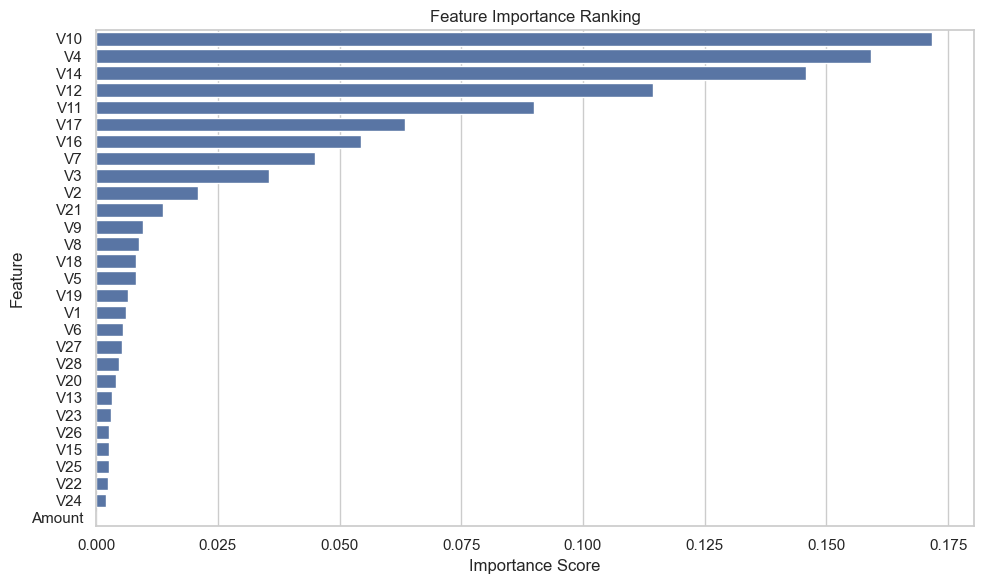

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data=feature_imp, x='Importance', y='Feature')
plt.title('Feature Importance Ranking')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

#### How features relate to each other

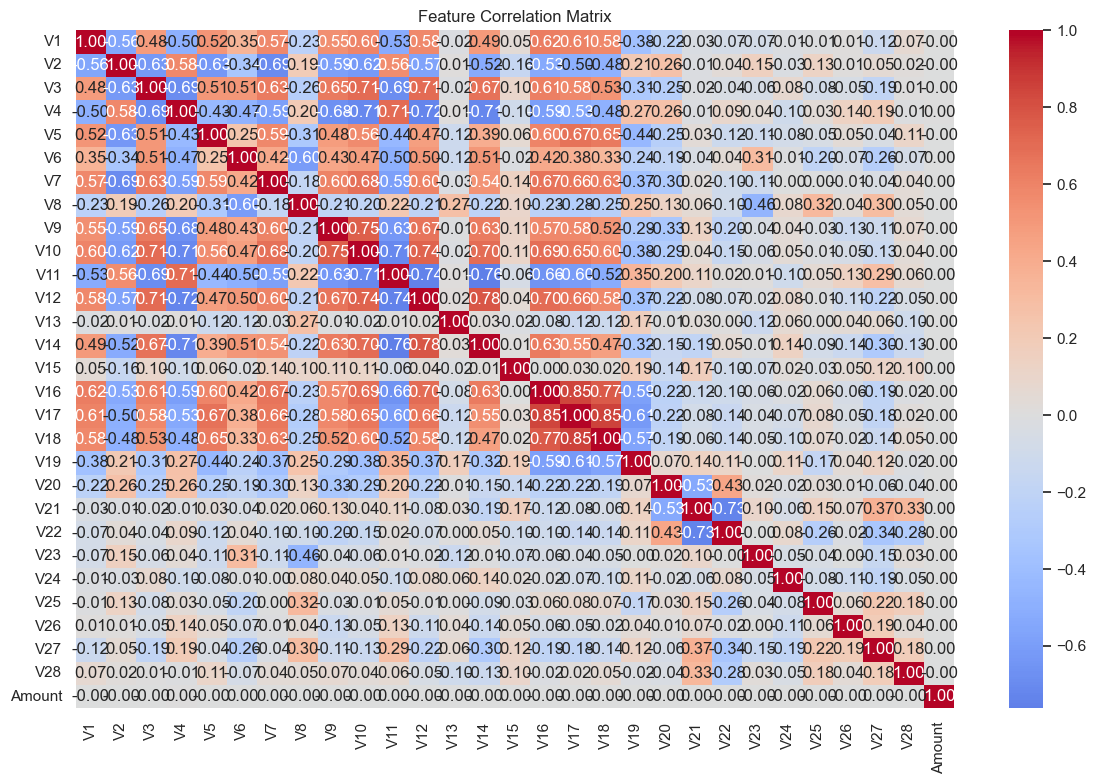

In [40]:
plt.figure(figsize=(12,8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# ROC - AUC Curve

In [42]:
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _  = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

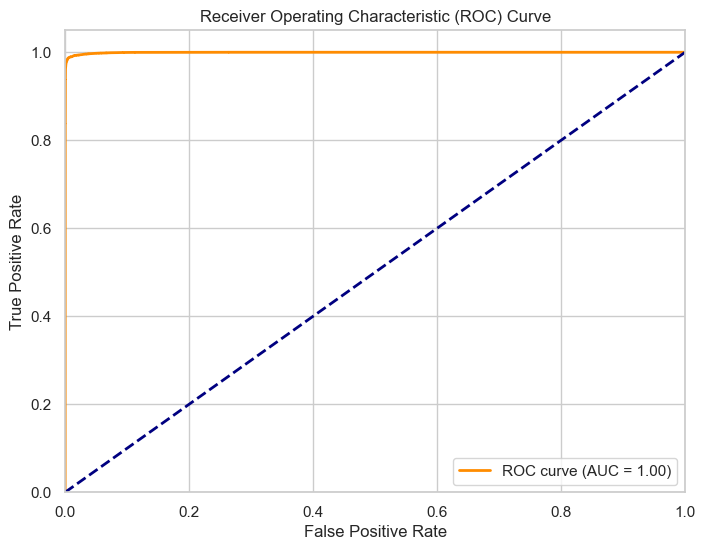

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Interpretation of the ROC–AUC Curve
While the ROC curve shows perfect discrimination, achieving an AUC of **1.00** is extremely rare in real-world fraud detection. This result is largely due to the oversimplified nature of the dataset—real-world fraud detection rarely has such clean patterns or balanced fraud-to-non-fraud ratios
The ROC curve indicates that the classifier is performing extremely well in distinguishing between fraudulent and non-fraudulent transactions.

### 1. AUC Score = 1.00
An AUC (Area Under the Curve) of **1.00** represents *perfect* classification performance. This means:

- The model assigns higher fraud probabilities to every fraudulent case than to any non-fraud case.
- There is **no overlap** between classes in terms of predicted probabilities.
- At almost any classification threshold:
  - **True Positive Rate (TPR) ≈ 1.0**
  - **False Positive Rate (FPR) ≈ 0.0**

This is the best possible result for a ROC curve.

### 2. Curve Shape
The curve closely follows the **top-left boundary**, which is the ideal region. This pattern indicates:

- Very high recall (most fraud cases are detected).
- Extremely low false positives (normal transactions rarely misclassified).
- Strong overall separability between the two classes.

The diagonal dashed line represents random guessing.  
Your curve being far above it shows that the model is performing significantly better than chance.

### 3. Conclusion
The ROC–AUC curve indicates near-perfect classifier performance. However, this result is largely due to the oversimplified nature of the dataset—real-world fraud detection rarely has such clean patterns or balanced fraud-to-non-fraud ratios